## Importing the required libraries

In [18]:
import os 
import numpy as np
import cv2
import pathlib
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

## PREPROCESSING
Function called 'load_images_from_folder' is used to load the spectrogram images from specific data path. Inside that function, images are converted from rgb to grayscale. Also normalization and resizing is done to these images. That images not added into the x list because it would be more beneficial to have more channels when creating a more successful model. Thus initial spectogram images is used in training part.

In [19]:
def load_images_from_folder(folder):
    x = [] #images
    y = [] #labels
    for dir in os.listdir(folder):
        for file in os.listdir(os.path.join(folder,dir)):
            img = cv2.imread(os.path.join(folder,dir,file))
            if img is not None:
                grayImage = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
                resized = cv2.resize(grayImage,(32,32))
                norm = np.zeros((400,400))
                nor_ver = cv2.normalize(norm,0,255,cv2.NORM_MINMAX)
                x.append(img)
                y.append(int(dir))
    return x,y

In [20]:
data_path=pathlib.Path("C:/Users/hilal okan/Downloads/spectrograms")
x,y=load_images_from_folder(data_path)

Print the first image in the list to see what the data it looks like.

In [21]:
print(x[0])

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [  3   0   0]
  [  3   0   0]
  [  3   0   0]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [  4   0   0]
  [  4   0   0]
  [  4   0   0]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


0


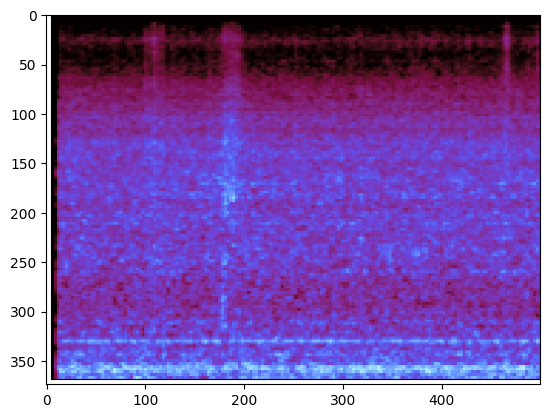

In [22]:
print(y[0])
plt.imshow(x[0])

We need three datasets: train, validate, test. %80 of the images is given to the train dataset. Rest of the dataset is divided between validation and test datasets. Print to see numbers of the datasets.

In [23]:
x_train, x_rem, y_train, y_rem = train_test_split(x,y, train_size=0.8)
x_valid, x_test, y_valid, y_test = train_test_split(x_rem,y_rem, test_size=0.5)

print(len(x))
print(len(x_train))
print(len(x_valid))
print(len(x_test))

8731
6984
873
874


np.asarray() is used to convert list to a numpy array.

In [24]:
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)
x_valid = np.asarray(x_valid)
y_valid = np.asarray(y_valid)
x_test = np.asarray(x_test)
y_test = np.asarray(y_test)


We finished the preparing of the data.